### 1. Installing & Importing Library

In [1]:
import keras
print(keras.__version__)

2.12.0


In [2]:
pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [3]:
from PyEMD import EMD
import PyEMD

In [4]:
# !git clone https://github.com/titu1994/Keras-just-another-network-JANET

In [5]:
# !git clone https://github.com/JosvanderWesthuizen/janet

In [6]:
# import sys
# sys.path.insert(0,'/content/janet/requirements.txt')

In [7]:
from scipy.io import loadmat

In [8]:
import tensorflow as tf

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os 
import scipy
import math
import keras
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from scipy import signal

In [10]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
from sklearn.preprocessing import scale,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

### Download Data

In [13]:
dat_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1730_complete.csv')
dat_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1750_complete.csv')
dat_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1772_complete.csv')
dat_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Downloaded_data/data_48k_1797_complete.csv')

In [14]:
dat_1.shape

(6813515, 5)

In [ ]:
dat_1.iloc[:10000,:].to_csv('/content/gdrive/MyDrive/IMS/Processed Data/48k_1730_10000.csv')

In [ ]:
dat_1.to_csv()

In [ ]:
temp_normal=dat_1.loc[dat_1.fault=='Normal.mat']
temp_007_ball=dat_1.loc[dat_1.fault=='0.007-Ball.mat']

In [66]:
dat_1

,Unnamed: 0,X125_DE_time,X125_FE_time,rpm,fault
0,0,0.253050,0.053829,1730.0,0.007-Ball.mat
1,1,0.257431,0.122656,1730.0,0.007-Ball.mat
2,2,0.238447,0.162515,1730.0,0.007-Ball.mat
3,3,0.218838,0.138065,1730.0,0.007-Ball.mat
4,4,0.191718,0.108685,1730.0,0.007-Ball.mat
...,...,...,...,...,...
6813510,485638,0.035673,0.125122,1730.0,Normal.mat
6813511,485639,-0.004590,0.124916,1730.0,Normal.mat
6813512,485640,-0.023574,0.109302,1730.0,Normal.mat
6813513,485641,0.005215,0.052185,1730.0,Normal.mat


## EMD

### Implementasi

In [ ]:
from PyEMD import EEMD

In [ ]:
eemd=EEMD()

In [ ]:
imfs = eemd.eemd(temp_normal.iloc[:1000,1].values)

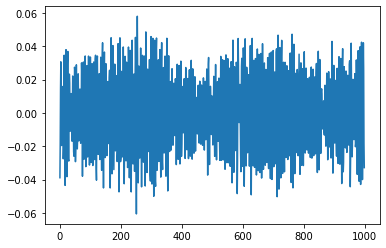

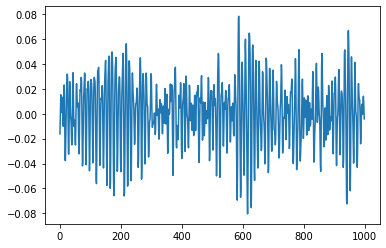

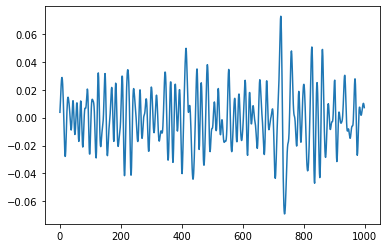

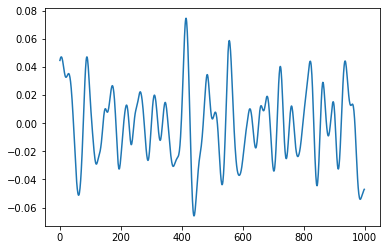

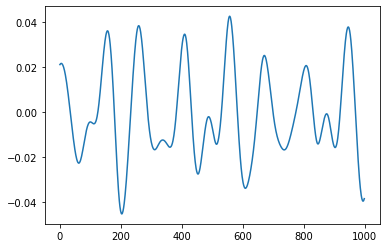

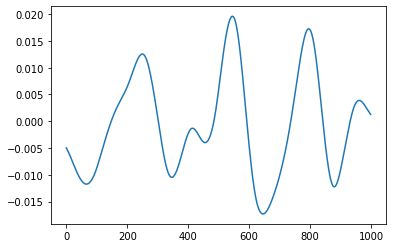

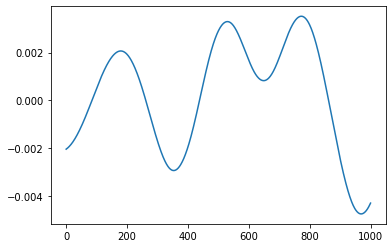

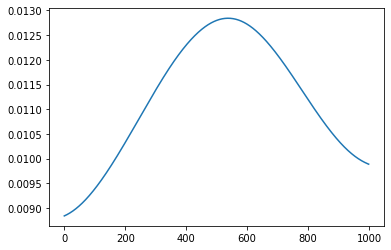

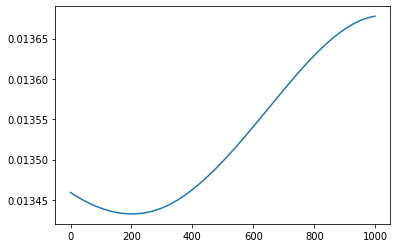

In [ ]:
for i in range(imfs.shape[0]):
  plt.figure()
  plt.plot(np.arange(imfs.shape[1]), imfs[i,:])

In [ ]:
imfs_1 = eemd.eemd(temp_007_ball.reset_index().drop('index',
                                                    axis=1).iloc[:1000,1].values)

In [ ]:
def emd(signal):
  from PyEMD import EEMD
  eemd = EEMD(fast=True)
  temp = eemd.eemd(signal)
  res = temp[0]+temp[1]+temp[2]

  return temp

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Evaluasi

In [ ]:
xx = emd(dat_1.iloc[:1000,1].values)

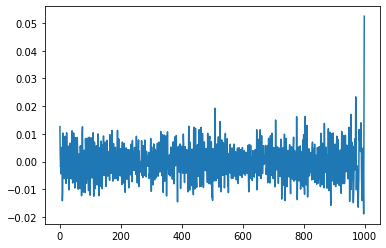

In [ ]:
plt.figure()
plt.plot(xx[0])

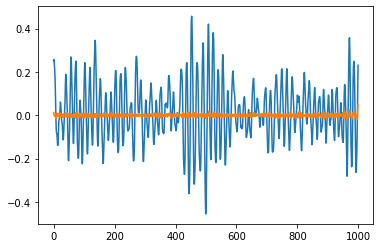

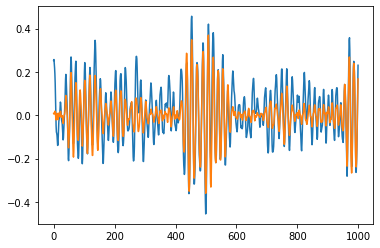

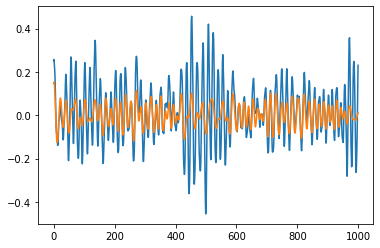

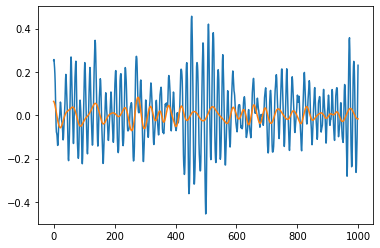

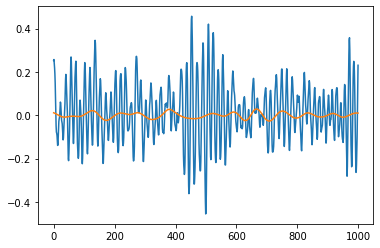

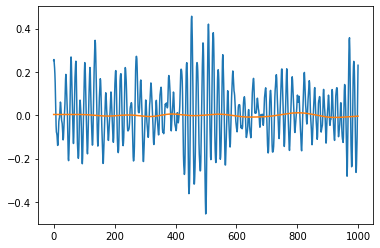

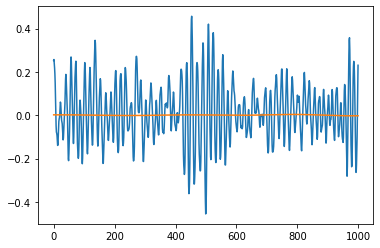

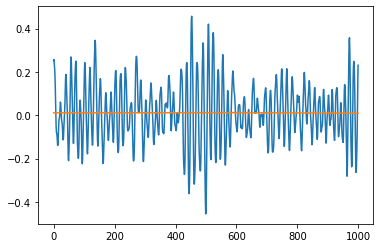

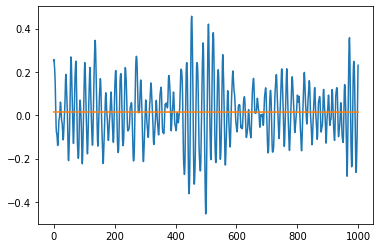

In [ ]:
for i in range(len(xx)):
  plt.figure()
  plt.plot(dat_1.iloc[:1000,1].values)
  plt.plot(xx[i])

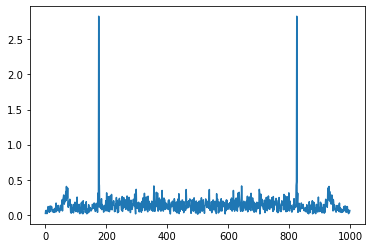

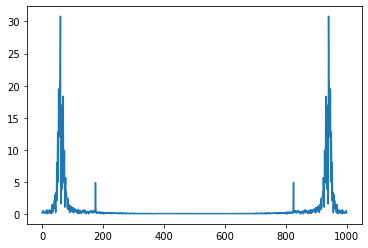

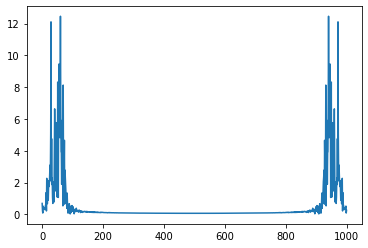

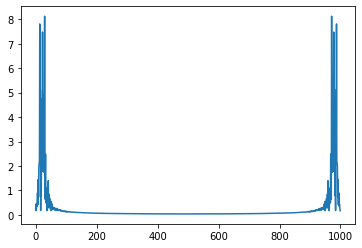

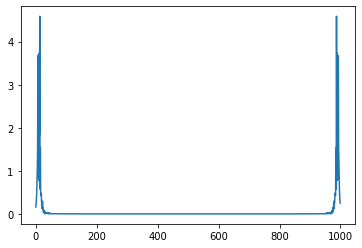

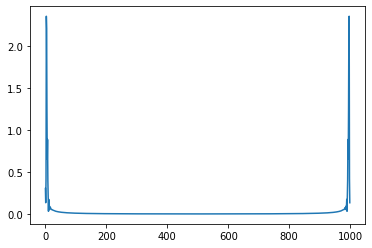

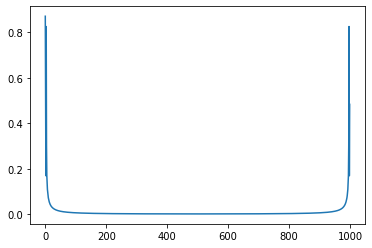

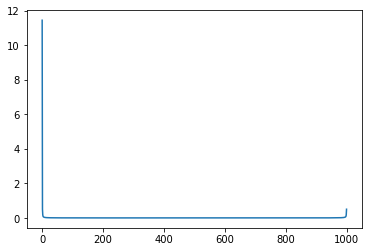

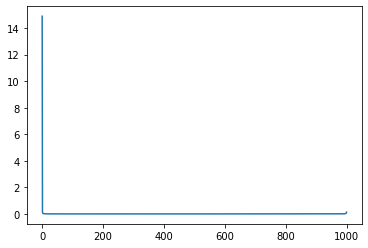

In [ ]:
for i in range(len(xx)):
  plt.figure()
  plt.plot(np.abs(np.fft.fft(xx[i])))

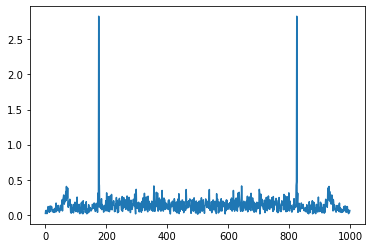

In [ ]:
plt.plot(np.abs(np.fft.fft(xx[0])))

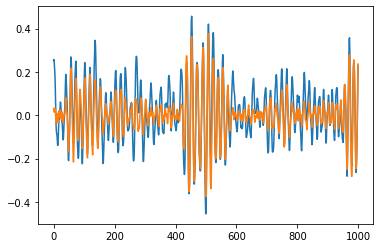

In [ ]:
plt.figure()
plt.plot(dat_1.iloc[:1000,1].values)
plt.plot(xx)

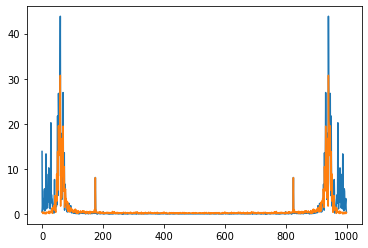

In [ ]:
plt.figure()

plt.plot(np.abs(np.fft.fft(dat_1.iloc[:1000,1].values)))
plt.plot(np.abs(np.fft.fft(xx)))

## Bandpass Filter

### Implementasi

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter

In [23]:
def lowpass(x):
  # Cut-off frequency of the filter (in Hz)
  lowcut = 1000
  highcut = 500

  # Sampling rate of the data (in Hz)
  fs = 20000

  # Filter order
  order = 2

  # Design the band-pass Butterworth filter
  nyquist = 0.5 * fs
  low = lowcut / nyquist
  high = highcut / nyquist
  b, a = butter(order, high, btype='low', analog=False)

  # Apply the filter to the data
  y = lfilter(b, a, x)

  return y

In [24]:
path = '/content/gdrive/MyDrive/IMS/CWRU Data/12DriveEndFault/1730/0.007-Ball.mat'


temp_x = loadmat(path)

bangbang=[i for x in temp_x[list((temp_x.keys()))[3]] for i in x]

In [61]:
len(bangbang)

121556

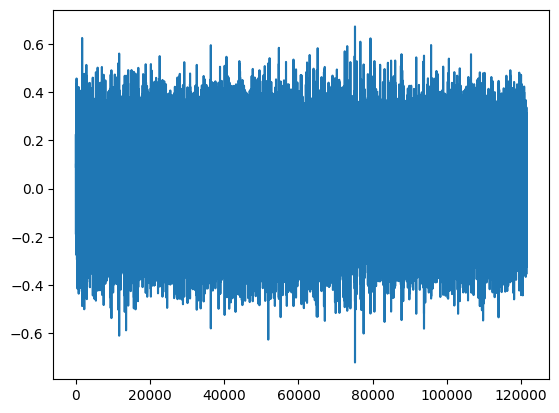

In [25]:
plt.plot(bangbang)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


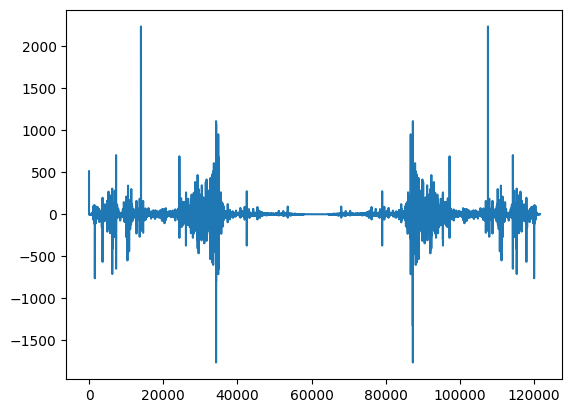

In [ ]:
plt.plot(np.fft.fft(bangbang))

In [ ]:
bangbang

[0.09031393213572854,
 0.22497265469061875,
 -0.1088315369261477,
 -0.18533848303393216,
 0.04791836327345309,
 0.0222536127744511,
 -0.0839789620758483,
 0.0402839121756487,
 0.08885201596806389,
 0.008933932135728542,
 -0.010233413173652695,
 0.08706522954091817,
 0.02339065868263473,
 -0.18956179640718565,
 -0.06481161676646706,
 0.1611356487025948,
 0.06010099800399202,
 0.0222536127744511,
 0.19053640718562875,
 0.11224267465069859,
 -0.10444578842315369,
 -0.07959321357285429,
 0.05474063872255489,
 -0.028913453093812373,
 -0.18111516966067864,
 -0.010395848303393213,
 0.14001908183632736,
 -0.01835516966067864,
 -0.08998906187624751,
 0.05116706586826347,
 0.10298387225548902,
 -0.01900491017964072,
 -0.08982662674650697,
 -0.0032487025948103793,
 0.13530846307385228,
 0.11938982035928143,
 -0.039471736526946105,
 -0.13222219560878243,
 -0.03005049900199601,
 0.04564427145708583,
 -0.08300435129740519,
 -0.14602918163672654,
 -0.04808079840319361,
 0.07959321357285429,
 0.036710

In [62]:
secs = len(bangbang)/12000 # Number of seconds in signal X
samps = secs*1000     # Number of samples to downsample
Y = scipy.signal.resample(bangbang, round(samps))

In [64]:
samps

10129.666666666668

In [ ]:
print(len(bangbang))

121556


In [ ]:
print(secs)
print(samps)

10.129666666666667
10129.666666666668


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


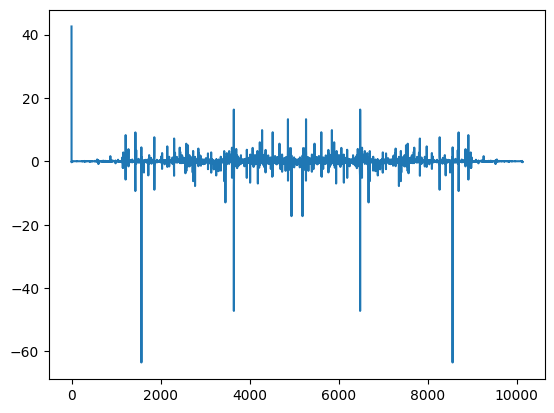

In [65]:
plt.figure()
plt.plot(np.fft.fft(Y))

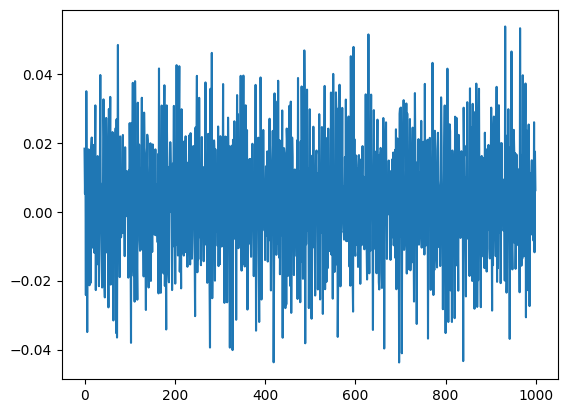

In [ ]:
plt.plot(Y[:1000])

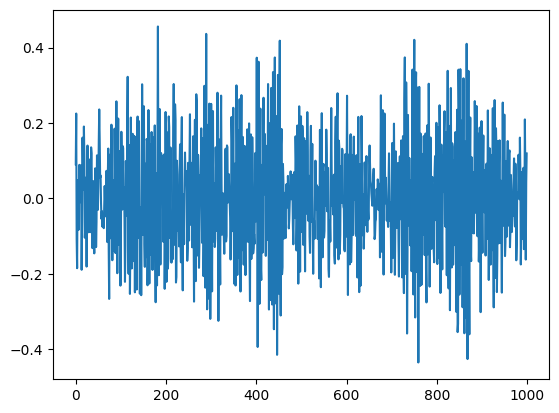

In [ ]:
plt.plot(bangbang[:1000])

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


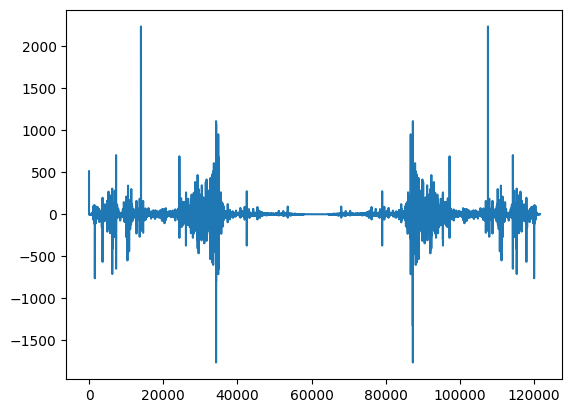

In [ ]:
plt.figure()
plt.plot(np.fft.fft(bangbang))

### Evaluasi

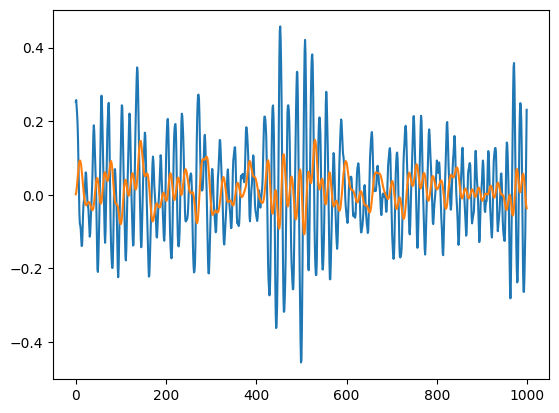

In [ ]:
plt.figure()
plt.plot(dat_1.iloc[:1000,1].values)
plt.plot(lowpass(dat_1.iloc[:1000,1].values))

In [ ]:
print(np.mean(dat_1.iloc[:1000,1].values))
print(np.mean(lowpass(dat_1.iloc[:1000,1].values)))

0.013859154461538459
0.014178006670921109


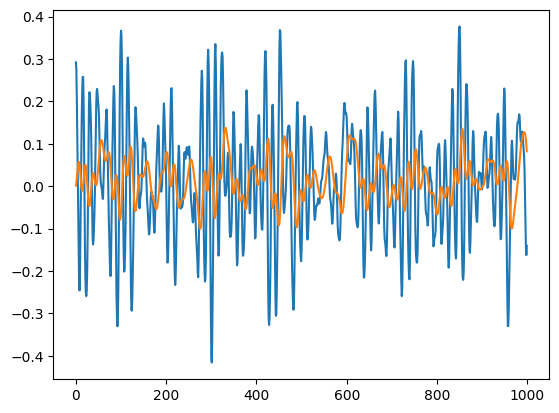

In [ ]:
plt.figure()
plt.plot(dat_1.iloc[1000:2000,1].values)
plt.plot(lowpass(dat_1.iloc[1000:2000,1].values))

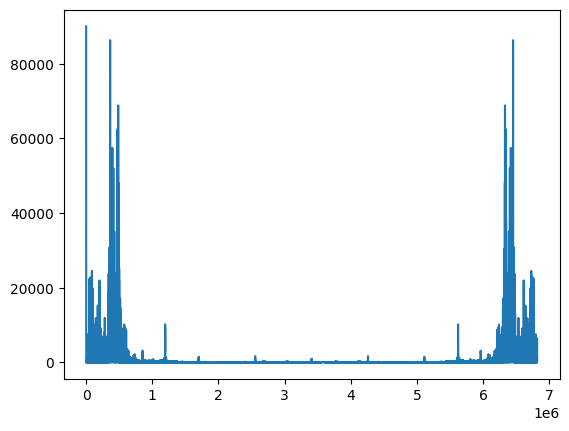

In [ ]:
plt.figure()

plt.plot(np.abs(np.fft.fft(dat_1.iloc[:,1].values)))

In [ ]:
dat_1.shape

(6813515, 5)

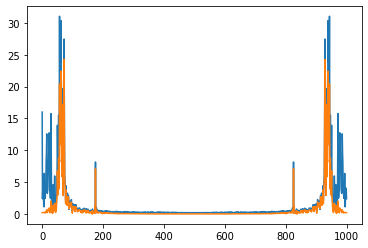

In [ ]:
plt.figure()

plt.plot(np.abs(np.fft.fft(dat_1.iloc[1000:2000,1].values)))
plt.plot(np.abs(np.fft.fft(bandpass(dat_1.iloc[1000:2000,1].values))))

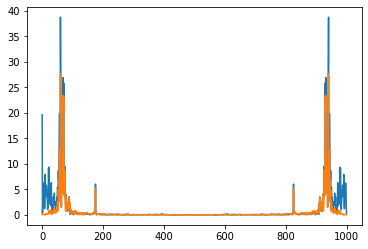

In [ ]:
plt.figure()

plt.plot(np.abs(np.fft.fft(dat_3.iloc[1000:2000,1].values)))
plt.plot(np.abs(np.fft.fft(bandpass(dat_3.iloc[1000:2000,1].values))))

## Seasonality

In [ ]:
temp_1 = emd(dat_1.loc[dat_1.fault=='Normal.mat'].iloc[:1000,1].values)

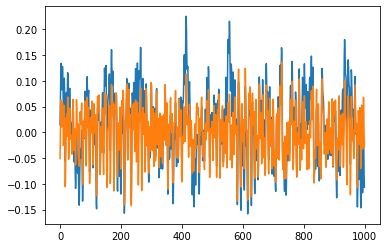

In [ ]:
plt.figure()
plt.plot(dat_1.loc[dat_1.fault=='Normal.mat'].iloc[:1000,1].values)
plt.plot(temp_1)

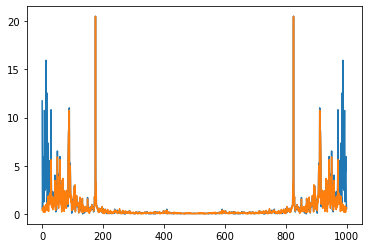

In [ ]:
plt.figure()
plt.plot(np.abs(np.fft.fft(dat_1.loc[dat_1.fault=='Normal.mat'].iloc[:1000,1].values)))
plt.plot(np.abs(np.fft.fft(temp_1)))

In [ ]:
%%time
temp_2=emd(dat_2.loc[dat_2.fault=='Normal.mat'].iloc[:1000,1].values)

CPU times: user 7.31 s, sys: 2.58 s, total: 9.89 s
Wall time: 8.04 s


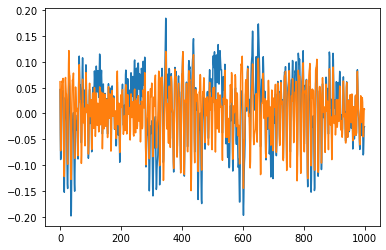

In [ ]:
plt.figure()
plt.plot(dat_2.loc[dat_2.fault=='Normal.mat'].iloc[:1000,1].values)
plt.plot(temp_2)

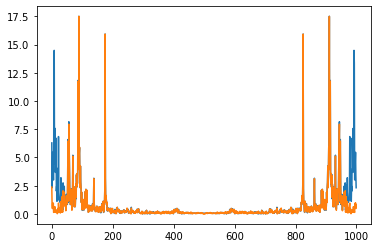

In [ ]:
plt.figure()
plt.plot(np.abs(np.fft.fft(dat_2.loc[dat_2.fault=='Normal.mat'].iloc[:1000,1].values)))
plt.plot(np.abs(np.fft.fft(temp_2)))

In [ ]:
import numpy as np

def emd(x):
    max_iterations = 20
    imf = []
    x1 = x.copy()
    for n in range(max_iterations):
        # Find the local maxima and minima
        max_peaks = np.array([i for i in range(1, len(x1) - 1) if x1[i] > x1[i - 1] and x1[i] > x1[i + 1]])
        min_peaks = np.array([i for i in range(1, len(x1) - 1) if x1[i] < x1[i - 1] and x1[i] < x1[i + 1]])

        # Create a spline function to interpolate the maxima and minima
        spline = np.interp(range(len(x1)), np.concatenate(([0], max_peaks, [len(x1) - 1])), np.concatenate(([x1[0]], x1[max_peaks], [x1[-1]])))

        # Subtract the spline from the original signal
        x1 = x1 - spline

        # Append the residual to the IMF list
        imf.append(x1)

        # If the residual is a monotonic function, stop the decomposition
        if is_monotonic(x1):
            break

    # Return the IMFs
    return imf

def is_monotonic(x):
    # Check if the signal is monotonic by comparing the signs of the differences
    return all(np.diff(np.sign(np.diff(x))) == 0)

x = dat_1.iloc[:1000,1].values
imfs = emd(x)

In [ ]:
from PyEMD.checks import whitenoise_check
from PyEMD import EMD

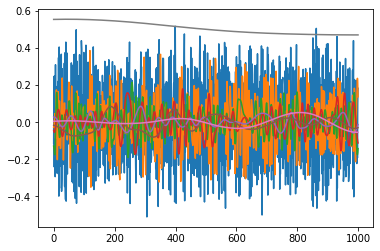

In [ ]:
import numpy as np
from PyEMD import CEEMDAN

# Input vibration data
x = dat_1.iloc[:1000,1].values

# Create a CEEMDAN object
ceemdan = CEEMDAN()

# Decompose the signal
imfs = ceemdan.ceemdan(x)

# Plot the IMFs
import matplotlib.pyplot as plt
for i in range(imfs.shape[0]):
    plt.plot(imfs[i,:])
plt.show()

## Wavelet Packet Energy

### Implementasi

In [16]:
import pywt

In [17]:
temp = pywt.WaveletPacket(data=dat_1.iloc[:1000,1], wavelet='db4', mode='symmetric',maxlevel=3)

In [18]:
temp_x = temp['d'].data

In [19]:
def wavelet(sinyal):
  temp = pywt.WaveletPacket(data=sinyal, wavelet='db1', mode='symmetric')
  x = [node.path for node in temp.get_level(3, 'natural')]
  energy = [np.sum((temp[i].data)**2) for i in x]

  return energy

In [20]:
def apply_fft(x, fs, num_samples):
    f = np.linspace(0.0, (fs/2.0), num_samples//2)
    freq_values = np.fft.fft(x)
    freq_values = 2.0/num_samples * np.abs(freq_values[0:num_samples//2])
    return f, freq_values

In [29]:
a,b=apply_fft(bangbang,12000,len(bangbang))

In [72]:
dat_1.shape

(6813515, 5)

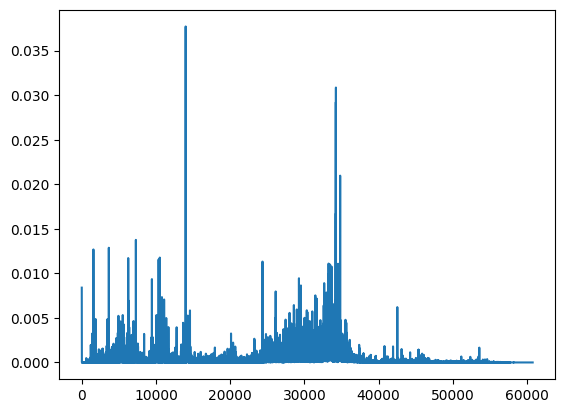

In [32]:
plt.plot(b)

In [55]:
aaa=scipy.signal.decimate(bangbang, round(len(bangbang)/12000), n=None, ftype='fir', axis=-1, zero_phase=True)

In [54]:
print(round(len(bangbang)/1000))

122


In [56]:
print(aaa)
print(len(aaa))

[ 0.00335451  0.01669174  0.00842757 ...  0.00486802 -0.00955999
  0.02773625]
12156


In [57]:
print(len(bangbang))

121556


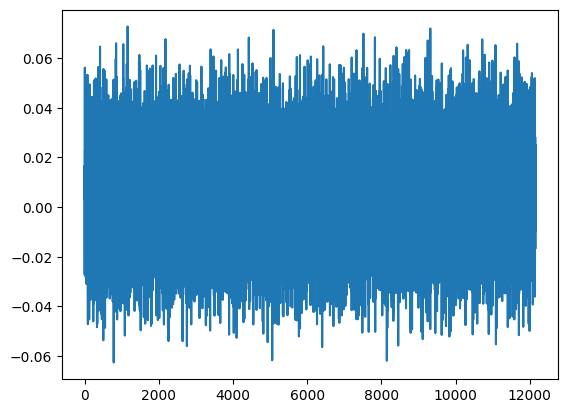

In [58]:
plt.plot(aaa)

In [59]:
aa,bb=apply_fft(aaa,1000,len(aaa))

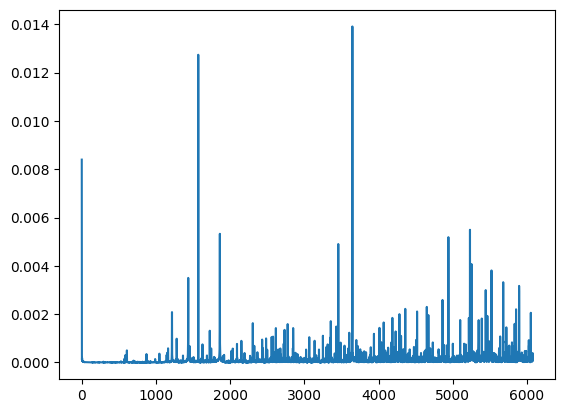

In [60]:
plt.plot(bb)

In [21]:
def wavelet_new(sinyal):
  temp = pywt.WaveletPacket(data=sinyal, wavelet='db4', mode='symmetric')
  x = [node.path for node in temp.get_level(3, 'natural')]
  temp_feature = [np.sum((temp[i].data)**2) for i in x]

  for i in x:
    new_wp = pywt.WaveletPacket(data = None, wavelet = 'db4', mode='symmetric',maxlevel=3)
    new_wp[i] = temp[i].data
    reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients
    f, c = apply_fft(reconstructed_signal, 1000, len(reconstructed_signal))

    z = abs(c)

    # Find  m  highest amplitudes of the spectrum and their corresponding frequencies:
    maximal_idx = np.argpartition(z, -1)[-1:]
    high_amp = z[maximal_idx]
    high_freq = f[maximal_idx]
    feature = high_amp*high_freq
    temp_feature.append(list(high_amp)[0])
    temp_feature.append(list(high_freq)[0])
    temp_feature.append(list(feature)[0])

  return temp_feature

In [22]:
wavelet_new(lowpass(dat_1.iloc[:1000,1]))

NameError: ignored

In [ ]:
f,freq=apply_fft(temp_x,48000,1000)

In [ ]:
new_wp = pywt.WaveletPacket(data = None, wavelet = 'db4', mode='symmetric',maxlevel=3)
new_wp['aad'] = temp['aad'].data
reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients
f, c = apply_fft(reconstructed_signal, 48000, len(reconstructed_signal))

z = abs(c)

# Find  m  highest amplitudes of the spectrum and their corresponding frequencies:
maximal_idx = np.argpartition(z, -1)[-1:]
high_amp = z[maximal_idx]
high_freq = f[maximal_idx]
feature = high_amp*high_freq

In [ ]:
high_amp

array([0.04682499])

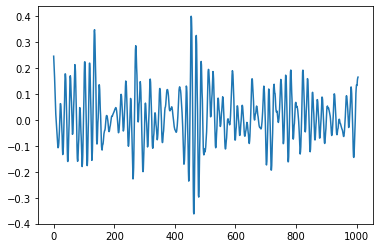

In [ ]:
plt.plot(reconstructed_signal)

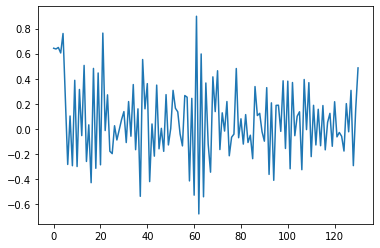

In [ ]:
plt.plot(temp['aaa'].data)

### Evaluasi

In [ ]:
wavelet(dat_1.iloc[:1000,1].values)

[10.265665818903761,
 5.271466548110484,
 0.9440357967300356,
 1.2789394942980354,
 0.21771997515862718,
 0.28675341426205925,
 0.05693408837936094,
 0.055812024215573935]

In [ ]:
wavelet(dat_1.iloc[1000:2000,1].values)

[11.171855478310722,
 5.138960812694625,
 0.8364545085974908,
 1.5239832496180827,
 0.1946565463092071,
 0.3413287307562604,
 0.06179696845434321,
 0.0662131336021775]

In [ ]:
wavelet(dat_1.loc[dat_1.fault=='Normal.mat'].iloc[:1000,1])

[2.778046821855052,
 0.8583603932943898,
 0.28771402870097024,
 0.5833131013746743,
 0.0394560540519763,
 0.08299501595190528,
 0.08084930896075734,
 0.1500299992655147]

In [ ]:
wavelet(dat_1.loc[dat_1.fault=='Normal.mat'].iloc[1000:2000,1])

[1.9299884746852531,
 0.9790106444282123,
 0.2791516009138933,
 0.7149455895118575,
 0.03632303286958576,
 0.0998592823785088,
 0.08354297015999994,
 0.1644988605281892]

## Wavelet Packet Entropy

In [ ]:
from scipy.stats import entropy

In [ ]:
def compute_shannon_entropy(signal):
    return -np.nansum(signal**2 * np.log(signal**2))

In [ ]:
def wavelet_entropy(sinyal):
  temp = pywt.WaveletPacket(data=sinyal, wavelet='db1', mode='symmetric')
  x = [node.path for node in temp.get_level(3, 'natural')]
    
  entropy_ = [compute_shannon_entropy(temp[i].data) for i in x]

  return entropy_

#### Temporary

In [ ]:
def compute_shannon_entropy(signal):
    return -np.nansum(signal**2 * np.log(signal**2))

In [ ]:
file = np.load("CWRU_48k_load_1_CNN_data.npz")
print(file.files)

data = file["data"]
labels = file["labels"]
print(data.shape, labels.shape)

resized_data = np.reshape(data, (2300,2048))
resized_data.shape

wp = pywt.WaveletPacket(resized_data[0,:], wavelet = "sym8", maxlevel = 3) # Comp

packet_names = [node.path for node in wp.get_level(3, "natural")]  # Packet node names. 
packet_names  # The naming of nodes as "aaa", "aad" is con

[wp[node.path].data.shape for node in wp.get_level(3, "natural")] # Number of coefficients after 3 stage transformation.

feature_matrix_wav_packet_entropy = np.repeat(np.nan, 2300*8).reshape(2300,8)
for i in range(len(resized_data)):
    wp = pywt.WaveletPacket(resized_data[i,:], wavelet = "sym8", maxlevel = 3) # Wavelet packet transformation
    for j in range(8):
        new_wp = pywt.WaveletPacket(data = None, wavelet = "sym8", maxlevel = 3)
        print(new_wp)
        new_wp[packet_names[j]] = wp[packet_names[j]].data
        print(len(wp[packet_names[j]].data))
        reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients
        feature_matrix_wav_packet_entropy[i,j] = compute_shannon_entropy(reconstructed_signal)
    print('kons')

In [ ]:
feature_matrix_wav_packet_entropy.shape

(2300, 8)

In [ ]:
len(reconstructed_signal)

2054

## Langsung Coba ke Data

### Energy

In [ ]:
def wav_feature(dat_1,length,col):
  merged_dat = pd.DataFrame()

  for i in range(len(dat_1.fault.unique())):
    temp = dat_1.loc[dat_1.fault==dat_1.fault.unique()[i]]
    wavelett = [wavelet(lowpass(temp.iloc[xx:xx+length,col].values))
                if (xx+length<temp.shape[0]) else wavelet(lowpass(temp.iloc[xx:temp.shape[0],col].values))
                for xx in range(0,temp.shape[0],length)]

    fault = [temp.iloc[0,-1] for k in range(0,temp.shape[0],length)]
      
    res_dat = pd.concat([pd.DataFrame(wavelett),
                        pd.DataFrame(fault)],axis=1)
    
    merged_dat = pd.concat([merged_dat,res_dat],axis=0)

  return merged_dat

In [ ]:
wav_feature(dat_1,1000,1).reset_index().drop('index',axis=1)

NameError: ignored

In [ ]:
merged_dat_1=wav_feature(dat_1,1000,1).reset_index().drop('index',axis=1)
merged_dat_2=wav_feature(dat_2,1000,1).reset_index().drop('index',axis=1)
merged_dat_3=wav_feature(dat_3,1000,1).reset_index().drop('index',axis=1)
merged_dat_4=wav_feature(dat_4,1000,1).reset_index().drop('index',axis=1)
merged_dat_5=wav_feature(dat_1,1000,2).reset_index().drop('index',axis=1)
merged_dat_6=wav_feature(dat_2,1000,2).reset_index().drop('index',axis=1)
merged_dat_7_=wav_feature(dat_3,1000,2).reset_index().drop('index',axis=1)
merged_dat_8=wav_feature(dat_4,1000,2).reset_index().drop('index',axis=1)

In [ ]:
merged_dat_1.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1730_filtered.csv')
merged_dat_2.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1750_filtered.csv')
merged_dat_3.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1772_filtered.csv')
merged_dat_4.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_DE_1797_filtered.csv')
merged_dat_5.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1730_filtered.csv')
merged_dat_6.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1750_filtered.csv')
merged_dat_7_.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1772_filtered.csv')
merged_dat_8.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_features_FE_1797_filtered.csv')

In [ ]:
%%time
wav_feature(dat_1.iloc[:1000,:],1000,1).reset_index().drop('index',axis=1)

CPU times: user 7.97 ms, sys: 0 ns, total: 7.97 ms
Wall time: 11.4 ms


,0,1,2,3,4,5,6,7,0
0,6.57403,4.703352,0.81994,1.032638,0.18957,0.237368,0.040311,0.032429,0.007-Ball.mat


### Entropy

In [ ]:
def entro_feature(dat_1,length,col):
  merged_dat = pd.DataFrame()

  for i in range(len(dat_1.fault.unique())):
    temp = dat_1.loc[dat_1.fault==dat_1.fault.unique()[i]]
    wavelett = [wavelet_entropy(bandpass(temp.iloc[xx:xx+length,col].values))
                if (xx+length<temp.shape[0]) else wavelet_entropy(bandpass(temp.iloc[xx:temp.shape[0],col].values))
                for xx in range(0,temp.shape[0],length)]

    fault = [temp.iloc[0,-1] for k in range(0,temp.shape[0],length)]
      
    res_dat = pd.concat([pd.DataFrame(wavelett),
                        pd.DataFrame(fault)],axis=1)
    
    merged_dat = pd.concat([merged_dat,res_dat],axis=0)

  return merged_dat

[np.max(temp.iloc[xx:xx+1000,0]) if (xx+1000<temp.shape[0]) else 
        np.max(temp.iloc[xx:temp.shape[0],0]) for xx in range(0,temp.shape[0],1000)]


In [ ]:
entro_feature(dat_1,1000,1)

<ipython-input-331-b4f3ac7c588e>:5: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-331-b4f3ac7c588e>:5: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))


,0,1,2,3,4,5,6,7,0
0,8.823756,9.877000,2.778735,2.391748,0.855100,0.691573,0.209764,0.344443,0.007-Ball.mat
1,8.638385,11.986584,3.385297,2.730363,1.026607,0.806825,0.247129,0.413871,0.007-Ball.mat
2,9.798510,11.521805,3.228156,3.639007,0.949300,1.076816,0.259711,0.369997,0.007-Ball.mat
3,12.203145,13.165349,3.735545,4.332906,1.124723,1.323350,0.335010,0.420818,0.007-Ball.mat
4,12.399372,11.418682,3.217944,3.904819,0.957435,1.163081,0.271563,0.366513,0.007-Ball.mat
...,...,...,...,...,...,...,...,...,...
481,1.562632,3.369706,1.313662,2.548955,0.235379,0.531079,0.458389,0.874228,Normal.mat
482,1.260898,2.802540,1.344526,2.477367,0.233699,0.492953,0.426854,0.813181,Normal.mat
483,1.554470,2.796613,1.078857,2.375943,0.178822,0.477594,0.445830,0.819579,Normal.mat
484,1.415348,3.658735,1.241026,2.620835,0.229844,0.550840,0.429939,0.815070,Normal.mat


In [ ]:
entro_dat_1=entro_feature(dat_1,1000,1).reset_index().drop('index',axis=1)
entro_dat_2=entro_feature(dat_2,1000,1).reset_index().drop('index',axis=1)
entro_dat_3=entro_feature(dat_3,1000,1).reset_index().drop('index',axis=1)
entro_dat_4=entro_feature(dat_4,1000,1).reset_index().drop('index',axis=1)
entro_dat_5=entro_feature(dat_1,1000,2).reset_index().drop('index',axis=1)
entro_dat_6=entro_feature(dat_2,1000,2).reset_index().drop('index',axis=1)
entro_dat_7=entro_feature(dat_3,1000,2).reset_index().drop('index',axis=1)
entro_dat_8=entro_feature(dat_4,1000,2).reset_index().drop('index',axis=1)

<ipython-input-331-b4f3ac7c588e>:5: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-331-b4f3ac7c588e>:5: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))


In [ ]:
entro_dat_1.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_DE_1730_filtered.csv')
entro_dat_2.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_DE_1750_filtered.csv')
entro_dat_3.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_DE_1772_filtered.csv')
entro_dat_4.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_DE_1797_filtered.csv')
entro_dat_5.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_FE_1730_filtered.csv')
entro_dat_6.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_FE_1750_filtered.csv')
entro_dat_7.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_FE_1772_filtered.csv')
entro_dat_8.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/entro_features_FE_1797_filtered.csv')

In [ ]:
merged_dat_1.head()

,0,1,2,3,4,5,6,7,0
0,6.574030,4.703352,0.819940,1.032638,0.189570,0.237368,0.040311,0.032429,0.007-Ball.mat
1,7.044278,4.889275,0.815676,1.295773,0.187417,0.296302,0.048880,0.041211,0.007-Ball.mat
2,7.458907,4.207235,0.674522,1.476732,0.154113,0.337489,0.055499,0.041206,0.007-Ball.mat
3,6.145178,10.096322,1.688907,1.217135,0.388335,0.277475,0.044787,0.078592,0.007-Ball.mat
4,6.051937,8.224890,1.390868,1.042623,0.320749,0.238607,0.039533,0.061394,0.007-Ball.mat


### New

In [ ]:
dat_1

NameError: ignored

In [15]:
def wav_feature_new(dat_1,length,col):
  merged_dat = pd.DataFrame()

  for i in range(len(dat_1.fault.unique())):
    temp = dat_1.loc[dat_1.fault==dat_1.fault.unique()[i]]
    wavelett = [wavelet_new(lowpass(temp.iloc[xx:xx+length,col].values))
                if (xx+length<temp.shape[0]) else wavelet_new(lowpass(temp.iloc[xx:temp.shape[0],col].values))
                for xx in range(0,temp.shape[0],length)]

    fault = [temp.iloc[0,-1] for k in range(0,temp.shape[0],length)]
      
    res_dat = pd.concat([pd.DataFrame(wavelett),
                        pd.DataFrame(fault)],axis=1)
    
    merged_dat = pd.concat([merged_dat,res_dat],axis=0)

  return merged_dat

In [67]:
dat_1

,Unnamed: 0,X125_DE_time,X125_FE_time,rpm,fault
0,0,0.253050,0.053829,1730.0,0.007-Ball.mat
1,1,0.257431,0.122656,1730.0,0.007-Ball.mat
2,2,0.238447,0.162515,1730.0,0.007-Ball.mat
3,3,0.218838,0.138065,1730.0,0.007-Ball.mat
4,4,0.191718,0.108685,1730.0,0.007-Ball.mat
...,...,...,...,...,...
6813510,485638,0.035673,0.125122,1730.0,Normal.mat
6813511,485639,-0.004590,0.124916,1730.0,Normal.mat
6813512,485640,-0.023574,0.109302,1730.0,Normal.mat
6813513,485641,0.005215,0.052185,1730.0,Normal.mat


In [73]:
dat_1_DE=scipy.signal.decimate(dat_1.iloc[:,1].values, round(len(dat_1.iloc[:,1].values)/(48000*140)), n=None, ftype='fir', axis=-1, zero_phase=True)
dat_1_FE=scipy.signal.decimate(dat_1.iloc[:,2].values, round(len(dat_1.iloc[:,2].values)/48000), n=None, ftype='fir', axis=-1, zero_phase=True)
dat_2_DE=scipy.signal.decimate(dat_2.iloc[:,1].values, round(len(dat_2.iloc[:,1].values)/48000), n=None, ftype='fir', axis=-1, zero_phase=True)
dat_2_FE=scipy.signal.decimate(dat_2.iloc[:,2].values, round(len(dat_2.iloc[:,2].values)/48000), n=None, ftype='fir', axis=-1, zero_phase=True)
dat_3_DE=scipy.signal.decimate(dat_3.iloc[:,1].values, round(len(dat_3.iloc[:,1].values)/48000), n=None, ftype='fir', axis=-1, zero_phase=True)
dat_3_FE=scipy.signal.decimate(dat_3.iloc[:,2].values, round(len(dat_3.iloc[:,2].values)/48000), n=None, ftype='fir', axis=-1, zero_phase=True)
dat_4_DE=scipy.signal.decimate(dat_4.iloc[:,1].values, round(len(dat_4.iloc[:,1].values)/48000), n=None, ftype='fir', axis=-1, zero_phase=True)
dat_4_FE=scipy.signal.decimate(dat_4.iloc[:,2].values, round(len(dat_4.iloc[:,2].values)/48000), n=None, ftype='fir', axis=-1, zero_phase=True)

In [82]:
print(len(dat_1.iloc[:,2].values)/140000)

48.667964285714284


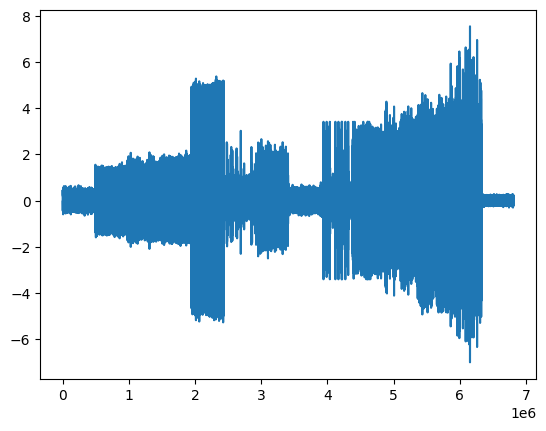

In [79]:
plt.plot(dat_1.iloc[:,1].values)

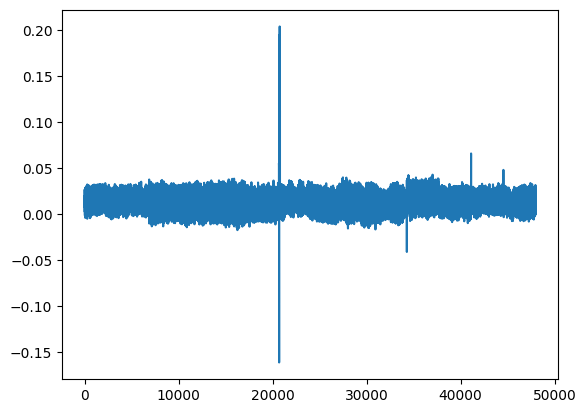

In [77]:
plt.plot(dat_1_DE)

In [ ]:
wav_new_1=wav_feature_new(dat_1,1000,1).reset_index().drop('index',axis=1)
wav_new_2=wav_feature_new(dat_2,1000,1).reset_index().drop('index',axis=1)
wav_new_3=wav_feature_new(dat_3,1000,1).reset_index().drop('index',axis=1)
wav_new_4=wav_feature_new(dat_4,1000,1).reset_index().drop('index',axis=1)
wav_new_5=wav_feature_new(dat_1,1000,2).reset_index().drop('index',axis=1)
wav_new_6=wav_feature_new(dat_2,1000,2).reset_index().drop('index',axis=1)
wav_new_7=wav_feature_new(dat_3,1000,2).reset_index().drop('index',axis=1)
wav_new_8=wav_feature_new(dat_4,1000,2).reset_index().drop('index',axis=1)

In [ ]:
wav_new_1.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1730.csv')
wav_new_2.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1750.csv')
wav_new_3.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1772.csv')
wav_new_4.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1797.csv')
wav_new_5.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1730.csv')
wav_new_6.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1750.csv')
wav_new_7.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1772.csv')
wav_new_8.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1797.csv')

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,0
0,5.113594,3.398368,0.066335,0.188110,0.000363,0.000953,0.004036,0.008289,0.034402,3011.952191,...,0.000542,20462.151394,11.091846,0.001455,14438.247012,21.008954,0.003129,15633.466135,48.909900,0.007-Ball.mat
1,4.634944,4.301267,0.095297,0.205185,0.000610,0.001382,0.004596,0.007870,0.030150,3011.952191,...,0.000600,20605.577689,12.371550,0.001394,14438.247012,20.126780,0.003131,15633.466135,48.944005,0.007-Ball.mat
2,3.349070,5.908644,0.065622,0.230325,0.000593,0.001104,0.002195,0.008790,0.026870,2581.673307,...,0.000480,20414.342629,9.796778,0.001356,14438.247012,19.571638,0.003358,15633.466135,52.491008,0.007-Ball.mat
3,5.864403,6.458018,0.105951,0.206189,0.000497,0.001265,0.001842,0.007576,0.042935,2677.290837,...,0.000653,20749.003984,13.547109,0.001265,14438.247012,18.259572,0.003145,15633.466135,49.162894,0.007-Ball.mat
4,4.933853,5.342517,0.095839,0.192577,0.000439,0.001083,0.002450,0.008361,0.048321,2581.673307,...,0.000516,20605.577689,10.623185,0.001358,14438.247012,19.609687,0.003142,15633.466135,49.120793,0.007-Ball.mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.267329,1.053005,0.137726,0.725051,0.000684,0.003971,0.015163,0.057146,0.008270,2772.908367,...,0.001527,20462.151394,31.238082,0.004190,14438.247012,60.490072,0.008124,15633.466135,127.003237,Normal.mat
6816,0.170857,0.853661,0.136078,0.685885,0.000796,0.003191,0.015027,0.057803,0.007630,2772.908367,...,0.001479,20462.151394,30.259801,0.004107,14438.247012,59.301009,0.008201,15633.466135,128.202557,Normal.mat
6817,0.106426,0.945977,0.145749,0.609229,0.000697,0.003179,0.015853,0.053544,0.004437,2916.334661,...,0.001491,20462.151394,30.500515,0.004186,14438.247012,60.442745,0.007977,15633.466135,124.706171,Normal.mat
6818,0.297730,1.121647,0.126715,0.673789,0.000599,0.003680,0.012905,0.057018,0.012743,2772.908367,...,0.001476,20462.151394,30.203010,0.003860,14438.247012,55.733411,0.007927,15633.466135,123.932605,Normal.mat
